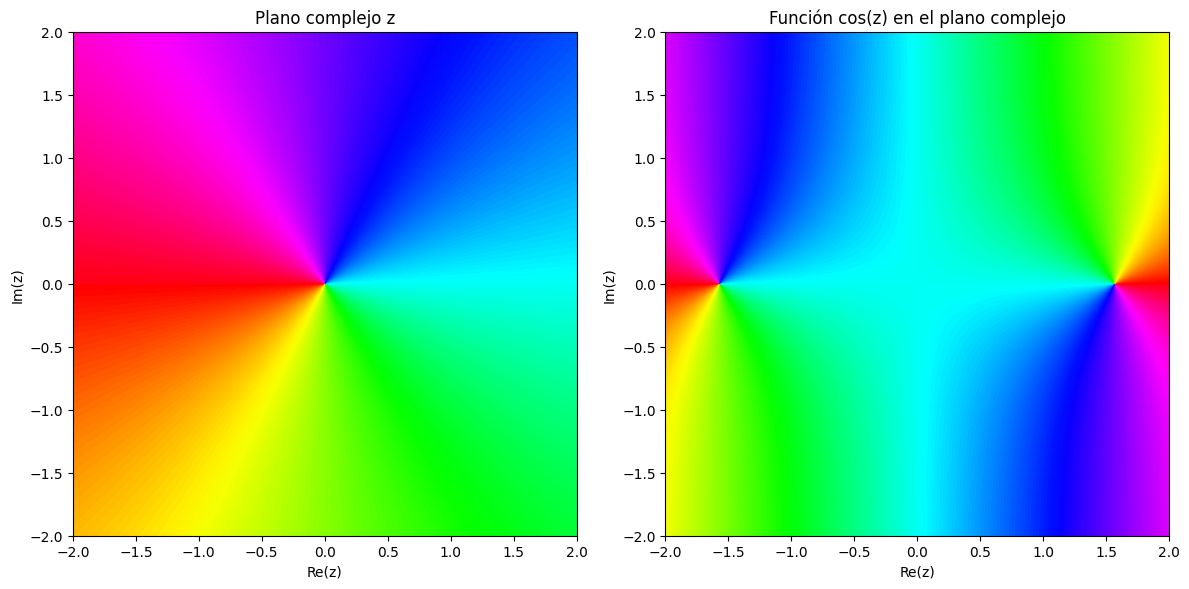

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una malla de puntos en el plano complejo
x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)
x, y = np.meshgrid(x, y)
z = x + 1j * y

# Calcular el coseno complejo de z
cos_z = np.cos(z)

# Preparar las figuras
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Primera gráfica: plano complejo original
axes[0].imshow(
    np.angle(z),
    extent=[-2, 2, -2, 2],
    origin="lower",
    cmap="hsv"
)
axes[0].set_title("Plano complejo z")
axes[0].set_xlabel("Re(z)")
axes[0].set_ylabel("Im(z)")

# Segunda gráfica: coseno complejo
axes[1].imshow(
    np.angle(cos_z),
    extent=[-2, 2, -2, 2],
    origin="lower",
    cmap="hsv"
)
axes[1].set_title("Función cos(z) en el plano complejo")
axes[1].set_xlabel("Re(z)")
axes[1].set_ylabel("Im(z)")

# Mostrar las gráficas
plt.tight_layout()
plt.show()


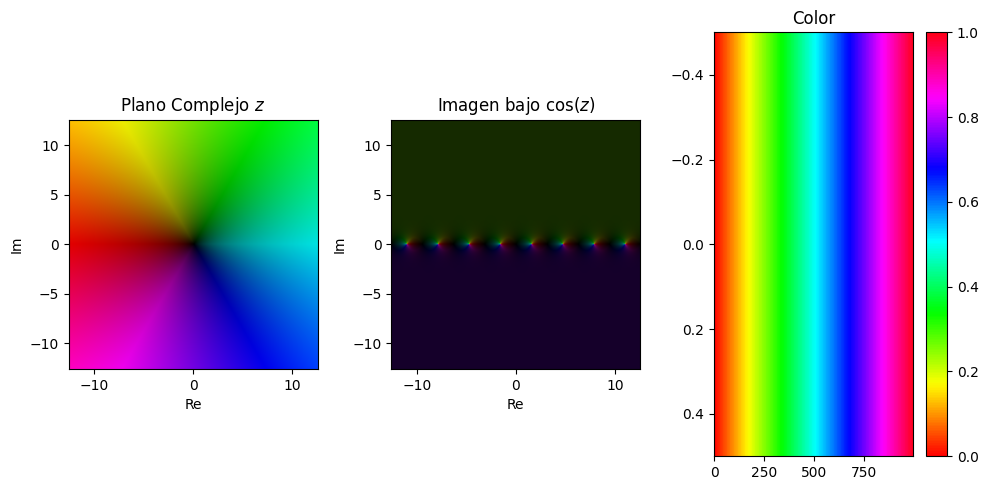

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Importar correctamente el submódulo colors

def domain_coloring(Z, func=lambda z: z):
    """
    Aplica Domain Coloring a una función compleja.
    
    Parameters:
        Z (ndarray): Malla del plano complejo.
        func (callable): Función compleja a visualizar.
        
    Returns:
        RGB image representing the domain coloring.
    """
    W = func(Z)
    # Calcula el argumento y la magnitud
    arg = np.angle(W)
    mag = np.abs(W)
    
    # Normaliza la magnitud para el brillo
    # Usamos log para manejar una amplia gama de magnitudes
    log_mag = np.log1p(mag)
    norm_log_mag = log_mag / np.max(log_mag)
    
    # Hue representa el argumento, Saturation fija
    hue = (arg + np.pi) / (2 * np.pi)  # Normalizado entre 0 y 1
    saturation = np.ones_like(hue)
    value = norm_log_mag
    
    # Combina los componentes HSV y convierte a RGB
    hsv = np.stack((hue, saturation, value), axis=-1)
    rgb = mcolors.hsv_to_rgb(hsv)  # Usar matplotlib.colors en lugar de plt.colors
    
    return rgb

# Define el rango del plano complejo
re_min, re_max = -4 * np.pi, 4 * np.pi
im_min, im_max = -4 * np.pi, 4 * np.pi
resolution = 800  # Mayor resolución para mayor detalle

# Crea una malla de puntos en el plano complejo
re = np.linspace(re_min, re_max, resolution)
im = np.linspace(im_min, im_max, resolution)
Re, Im = np.meshgrid(re, im)
Z = Re + 1j * Im

# Genera las imágenes de Domain Coloring
img_z = domain_coloring(Z, func=lambda z: z)
img_cos_z = domain_coloring(Z, func=np.tan)

# Crea las gráficas (incluyendo una barras de color como tercera imagen)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Gráfica del plano complejo original
axs[0].imshow(img_z, extent=(re_min, re_max, im_min, im_max))
axs[0].set_title("Plano Complejo $z$")
axs[0].set_xlabel("Re")
axs[0].set_ylabel("Im")
axs[0].set_aspect('equal')

# Gráfica de la imagen bajo $\cos(z)$

axs[1].imshow(img_cos_z, extent=(re_min, re_max, im_min, im_max))
axs[1].set_title("Imagen bajo $\cos(z)$")
axs[1].set_xlabel("Re")
axs[1].set_ylabel("Im")
axs[1].set_aspect('equal')

# Barras de color
cbar = axs[2].imshow(np.linspace(0, 1, 1000).reshape(1, -1), cmap='hsv', aspect='auto')
axs[2].set_title("Color")
fig.colorbar(cbar, ax=axs[2], orientation='vertical')

plt.tight_layout()
plt.show()


### Representacion intuitiva de las funciones z^n
Para entender mejor la representación de las funciones z^n, primero vamos a ver como se comportan las funciones z^n en el plano complejo. Para ello, vamos a representar las funciones z^n en el plano complejo para n = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.

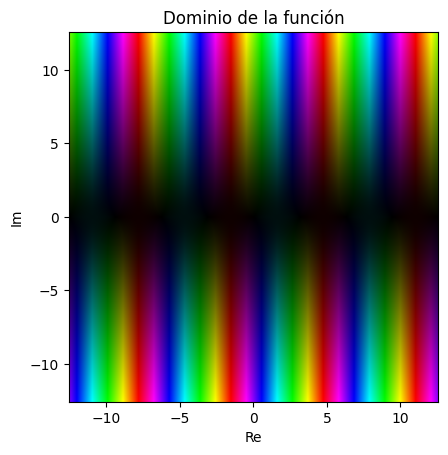

In [4]:
# primer paso: definir una clase que tenga varios métodos
class ComplexFunctionPlotter:
    def __init__(self, resolution=800):
        self.resolution = resolution
        self.re_min, self.re_max = -4 * np.pi, 4 * np.pi
        self.im_min, self.im_max = -4 * np.pi, 4 * np.pi
        self.re = np.linspace(self.re_min, self.re_max, self.resolution)
        self.im = np.linspace(self.im_min, self.im_max, self.resolution)
        self.Re, self.Im = np.meshgrid(self.re, self.im)
        self.Z = self.Re + 1j * self.Im

    def domain_coloring(self, func=lambda z: z):
        W = func(self.Z)
        arg = np.angle(W)
        mag = np.abs(W)
        log_mag = np.log1p(mag)
        norm_log_mag = log_mag / np.max(log_mag)
        hue = (arg + np.pi) / (2 * np.pi)
        saturation = np.ones_like(hue)
        value = norm_log_mag
        hsv = np.stack((hue, saturation, value), axis=-1)
        rgb = mcolors.hsv_to_rgb(hsv)
        return rgb

    def plot(self, func=lambda z: z):
        img = self.domain_coloring(func)
        plt.imshow(img, extent=(self.re_min, self.re_max, self.im_min, self.im_max))
        plt.title("Dominio de la función")
        plt.xlabel("Re")
        plt.ylabel("Im")
        plt.gca().set_aspect('equal')
        plt.show()
        
# segundo paso: crear una instancia de la clase y llamar al método plot
plotter = ComplexFunctionPlotter()
plotter.plot(lambda z: np.sin(z))


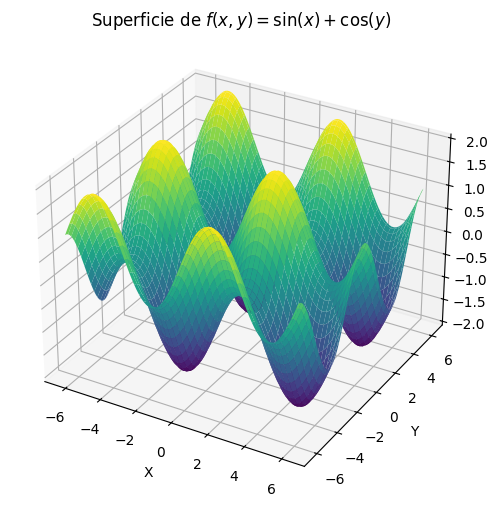

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# Definir la función a visualizar
def f(x, y):
    return np.sin(x) + np.cos(y)

# Crear la malla de puntos
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.linspace(-2 * np.pi, 2 * np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Crear la figura 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
ax.plot_surface(X, Y, Z, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Título de la gráfica
ax.set_title('Superficie de $f(x, y) = \sin(x) + \cos(y)$')

plt.show()


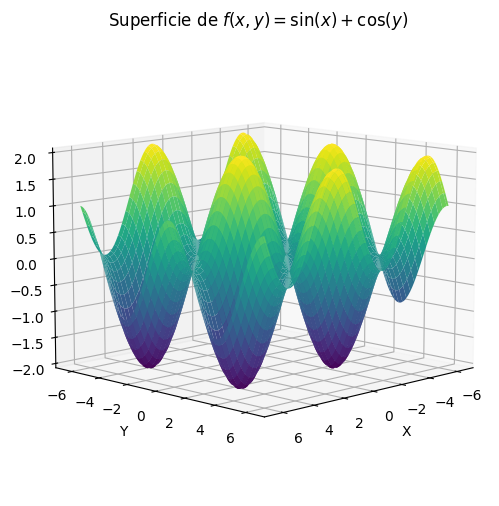

In [9]:
# Ahora realizaremos una visualización que tenga en cuenta el eje i con numeros complejos
from mpl_toolkits.mplot3d import Axes3D

# Definir la función a visualizar
def f(x, y):
    return np.sin(x) + np.cos(y)

# Crear la malla de puntos
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.linspace(-2 * np.pi, 2 * np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Crear la figura 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
ax.plot_surface(X, Y, Z, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Título de la gráfica
ax.set_title('Superficie de $f(x, y) = \sin(x) + \cos(y)$')

# Añadir el eje imaginario
ax.view_init(elev=10, azim=45)

plt.show()
